## Консультация по визуализации – ИАД-5

Полезные ссылки:
- [цвета](https://www.colorhexa.com/add8e6)
- [примеры](https://habr.com/ru/post/468295/)

#### Задание 1.

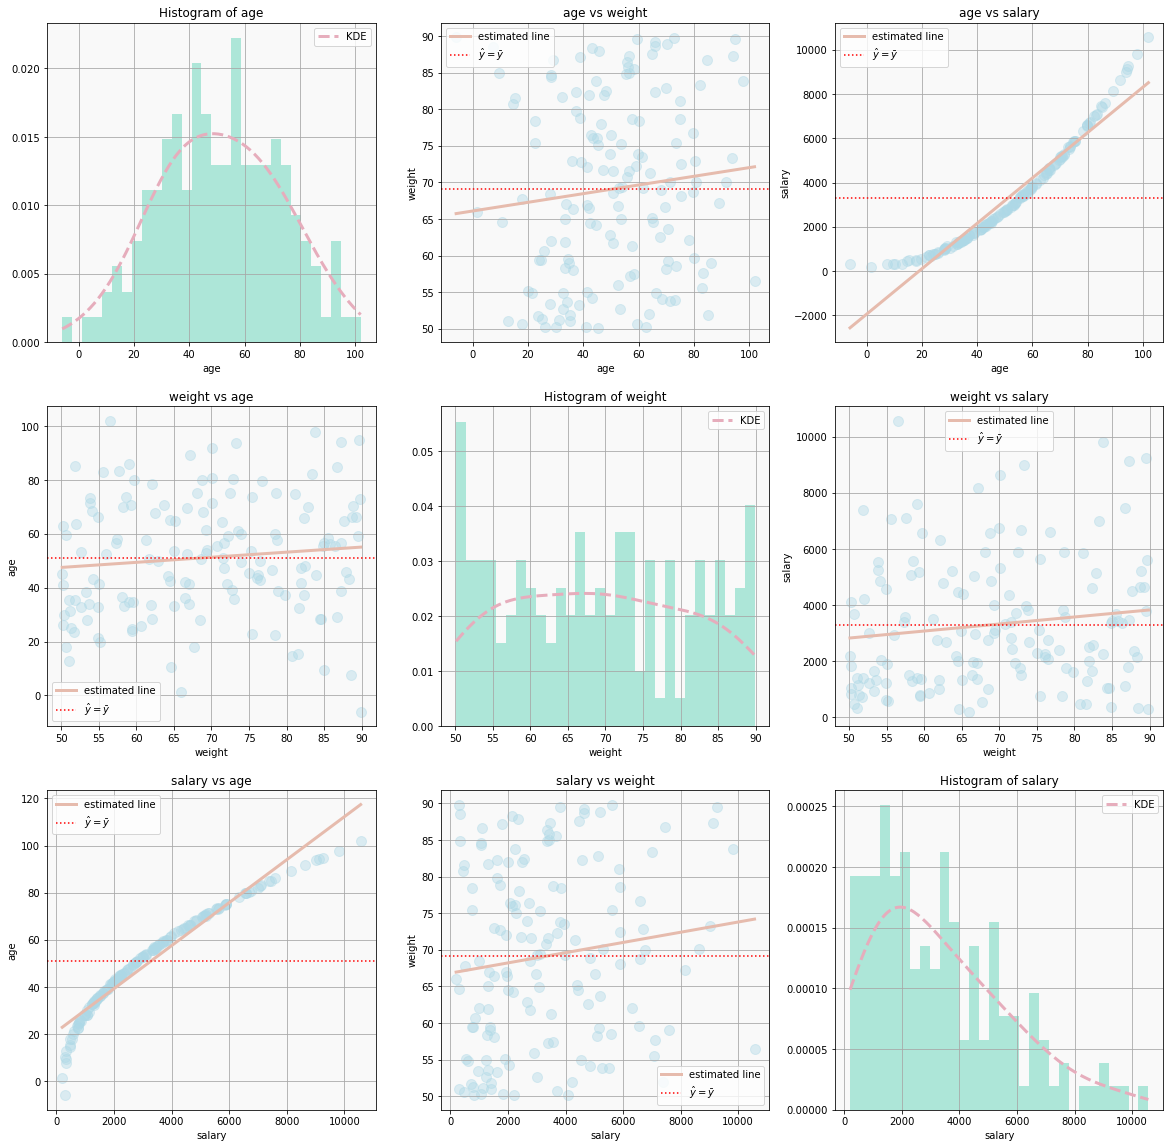

#### Задание 2.

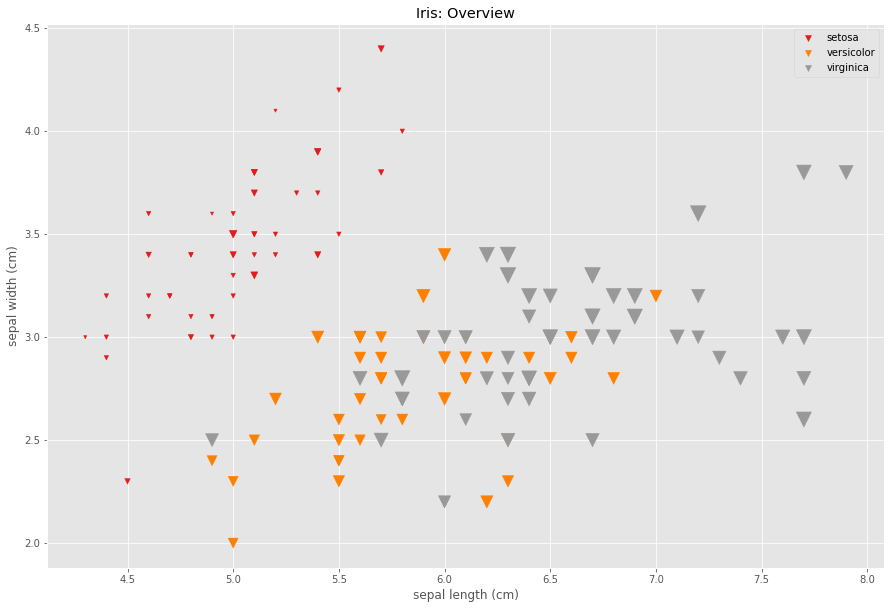

#### Задание 3.

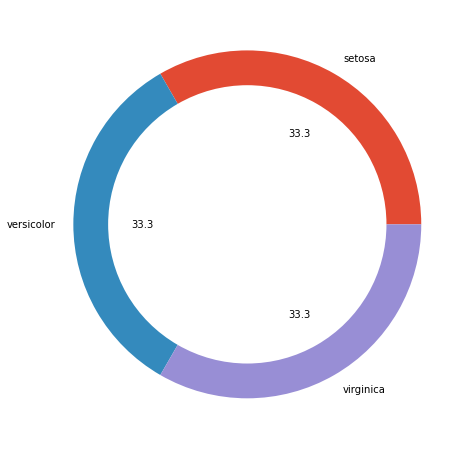

#### Задание 4.

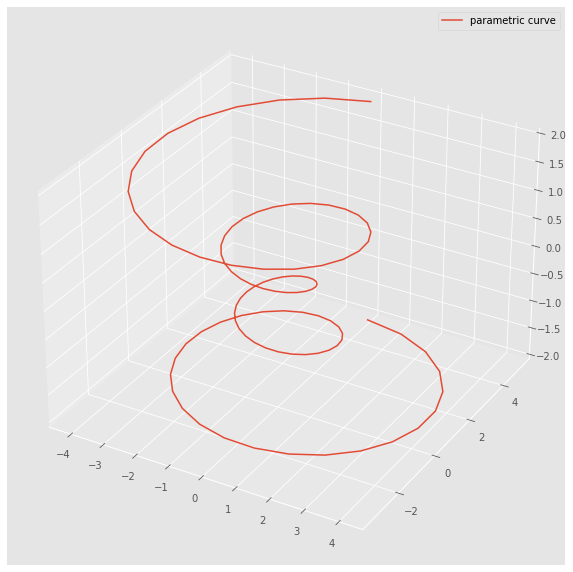

In [136]:
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

#### Задание 5.

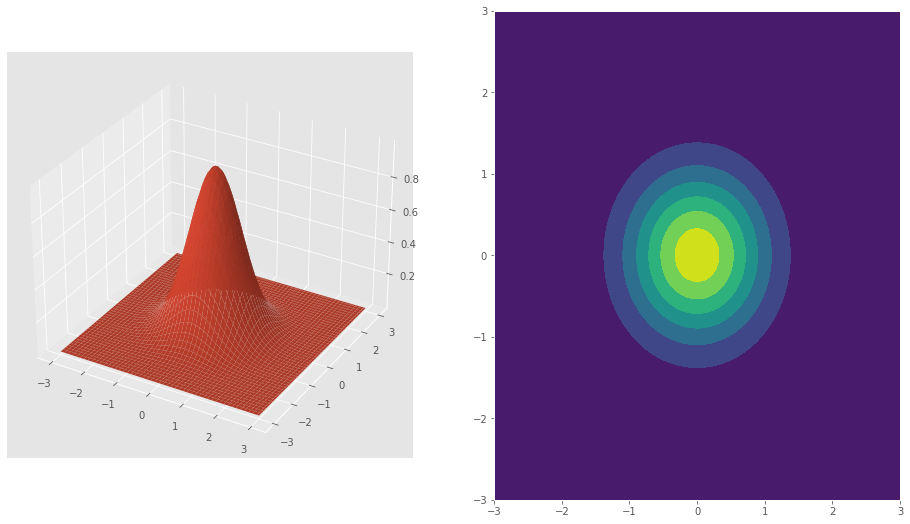